In [1]:
from intermine.webservice import Service
import numpy as np
import scipy.io
import seaborn as sns
from scipy import stats, optimize, interpolate
import pandas as pd
from collections import defaultdict 
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy import stats
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import os, fnmatch

In [2]:
data_sl=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_BioGrid\data-synthetic-lethals.xlsx',header=0)

###  Build  a program that reads the paralogs of the que query gene and see if that paralog is also SL of the query gene , by inspecting if the paralog is present in the target genes of the SL database. 
- this is the first check to analyze if the reason why a SL pair shares domains is because they are also paralogs. 



In [3]:
query_paralogs=pd.read_excel('paralogs_sL_from_query-genes.xlsx')
target_paralogs=pd.read_excel('paralogs_sL_from_target-genes.xlsx')

query_paralogs_pd=query_paralogs.drop(columns='Unnamed: 0')
query_paralogs_pd.columns=['name-gene','name-paralogue']

target_paralogs_pd=target_paralogs.drop(columns='Unnamed: 0')
target_paralogs_pd.columns=['name-gene','name-paralogue']

In [4]:
query_paralogs_pd.head()
target_paralogs_pd.head()

,name-gene,name-paralogue
0,FKH2,FKH1
1,IXR1,ABF2
2,LEM3,CDC50
3,SHC1,SKT5
4,VIK1,CIK1


In [5]:
indexes_sl_query=[]
for i in np.arange(0,len(query_paralogs_pd)):
    paralog_target=query_paralogs_pd[query_paralogs_pd['name-gene']==query_paralogs_pd['name-gene'][i]]['name-paralogue'].tolist()
    list_targets_sl=data_sl[data_sl['gene-query-name']==query_paralogs_pd['name-gene'][i]]['gene-target-name'].tolist()


    
    if paralog_target[0] in list_targets_sl:
        indexes_sl_query.append(query_paralogs_pd[query_paralogs_pd['name-paralogue']==paralog_target[0]].index[0])


indexes_sl_target=[]
for i in np.arange(0,len(target_paralogs_pd)): 
    
    paralog_query=target_paralogs_pd[target_paralogs_pd['name-gene']==target_paralogs_pd['name-gene'][i]]['name-paralogue'].tolist()
    list_queries_sl=data_sl[data_sl['gene-target-name']==target_paralogs_pd['name-gene'][i]]['gene-query-name'].tolist()


    if paralog_query[0] in list_queries_sl:
        indexes_sl_target.append(target_paralogs_pd[target_paralogs_pd['name-paralogue']==paralog_query[0]].index[0])



### Putting 1's if the paralog pair is also SL

In [8]:
sL_values=np.zeros_like(query_paralogs_pd['name-gene'])
for i in np.arange(0,len(query_paralogs_pd)):
    if i in indexes_sl_query:
        sL_values[i]=1
query_paralogs_pd['sL']=sL_values

sL_values=np.zeros_like(target_paralogs_pd['name-gene'])
for i in np.arange(0,len(target_paralogs_pd)):
    if i in indexes_sl_target:
        sL_values[i]=1
target_paralogs_pd['sL']=sL_values

In [9]:
paralogs_sl_pd=pd.concat([query_paralogs_pd,target_paralogs_pd],axis=0)

In [10]:
sl_that_are_paralogs=paralogs_sl_pd[paralogs_sl_pd['sL']==1]

In [11]:
sl_that_are_paralogs.set_index(np.arange(0,len(sl_that_are_paralogs)))

,name-gene,name-paralogue,sL
0,FKS1,GSC2,1
1,RAS2,RAS1,1
2,GSC2,FKS1,1
3,KRE6,SKN1,1
4,DBF2,DBF20,1
...,...,...,...
263,RPS24B,RPS24A,1
264,RPS26B,RPS26A,1
265,STD1,MTH1,1
266,ASK10,RGC1,1


In [12]:
sl_that_are_paralogs.iloc[0,0:2].tolist()

['FKS1', 'GSC2']

In [256]:
a= ['BUD6', 'CDC42']
b= ['CDC42', 'BUD6']
set(a)==set(b)

True

In [ ]:
## use this to compare with the pairs of SL that have shared domains from FEATUREPROCESSINg script  

In [13]:
pairs_sL=np.load('../pairs-sL-that-share-domains.npy')

In [14]:
len(pairs_sL)

748

In [15]:
len(sl_that_are_paralogs)

268

In [16]:
shared_sL_paralogs=[]
for i in np.arange(0,len(sl_that_are_paralogs)):
    for j in np.arange(0,len(pairs_sL)):
        if set(sl_that_are_paralogs.iloc[i,0:2].tolist())==set(pairs_sL[j]):
            shared_sL_paralogs.append(pairs_sL[j])



In [17]:
len(shared_sL_paralogs)

15

In [22]:
print('The contribution of paralogs to the SL pairs that shared domains is =', 100*len(shared_sL_paralogs)/len(pairs_sL),'%')
print('Only',len(shared_sL_paralogs),'out of',len(sl_that_are_paralogs),'paralogs that are SL , share annotated protein domains')

print('The number of paralogs that are SL out of the total number of paralogs is',len(sl_that_are_paralogs),'out of',len(paralogs_sl_pd),'=',100*len(sl_that_are_paralogs)/len(paralogs_sl_pd),'%')

print('The contribution of paralogs to the total number of SL pairs is  =', 100*len(sl_that_are_paralogs)/17871,'%')
print('The number of SL that share domains out of the total number of SL pairs is =',100*len(pairs_sL)/17871,'%')

The contribution of paralogs to the SL pairs that shared domains is = 2.0053475935828877 %
Only 15 out of 268 paralogs that are SL , share annotated protein domains
The number of paralogs that are SL out of the total number of paralogs is 268 out of 708 = 37.85310734463277 %
The contribution of paralogs to the total number of SL pairs is  = 1.4996362822449778 %
The number of SL that share domains out of the total number of SL pairs is = 4.185552011638968 %


In [39]:
# Pie chart
labels = ['SL-paralogs','Paralogs non SL']
sizes = [len(sl_that_are_paralogs)/len(paralogs_sl_pd),len(paralogs_sl_pd)/len(paralogs_sl_pd)-len(sl_that_are_paralogs)/len(paralogs_sl_pd)]

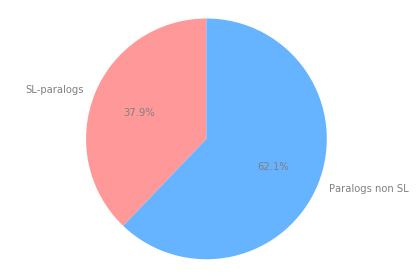

In [41]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
